<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).

## 🎨 Exploring VLM Hub Schemas

A guide to understanding and using VLM's diverse schema collection covering different visual content.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 23.3 MB/s eta 0:00:00


The `VLMRun` client provides the most intuitive way to interact with the VLM API. Let's initialize the client

In [2]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

··········


In [3]:
from vlmrun.client import VLMRun

client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

Now, let's explore the rich collection of schemas present in VLM Hub

In [4]:
from vlmrun.hub.registry import registry

In [5]:
# List available schemas
available_schemas = registry.list_schemas()
print(f"Available schemas in VLM Hub: {len(available_schemas)}")

2025-12-10 15:38:47.630 | DEBUG    | vlmrun.hub.registry:_load_catalog:53 - Loaded schemas from /usr/local/lib/python3.12/dist-packages/vlmrun/hub/catalog.yaml
2025-12-10 15:38:47.816 | DEBUG    | vlmrun.hub.registry:_load_catalog:53 - Loaded schemas from /usr/local/lib/python3.12/dist-packages/vlmrun/hub/schemas/contrib/catalog.yaml


Available schemas in VLM Hub: 30


In [6]:
# Group schemas by category
schema_categories = {}
for schema_name in available_schemas:
    category = schema_name.split('.')[0]
    if category not in schema_categories:
        schema_categories[category] = []
    schema_categories[category].append(schema_name)

for category, schemas in schema_categories.items():
    print(f"\n🔹 {category.upper()} ({len(schemas)} schema(s)):")
    for schema in schemas:
        schema_class = registry[schema]
        schema_json = schema_class.model_json_schema()
        print(f"  - {schema}")


🔹 ACCOUNTING (2 schema(s)):
  - accounting.form-payslip
  - accounting.form-w2

🔹 AEROSPACE (1 schema(s)):
  - aerospace.remote-sensing

🔹 DOCUMENT (14 schema(s)):
  - document.bank-check
  - document.bank-statement
  - document.business-card
  - document.form-work-order
  - document.in-aadhaar-card
  - document.in-pan-card
  - document.insurance-claim
  - document.invoice
  - document.receipt
  - document.request-for-proposal
  - document.resume
  - document.us-drivers-license
  - document.us-passport
  - document.utility-bill

🔹 FINANCE (1 schema(s)):
  - finance.balance-sheet

🔹 FOOD (1 schema(s)):
  - food.nutrition-facts-label

🔹 HEALTHCARE (3 schema(s)):
  - healthcare.hipaa-release
  - healthcare.medical-insurance-card
  - healthcare.pathology-report

🔹 LOGISTICS (1 schema(s)):
  - logistics.bill-of-lading

🔹 MEDIA (3 schema(s)):
  - media.nba-game-state
  - media.nfl-game-state
  - media.tv-news

🔹 REAL-ESTATE (1 schema(s)):
  - real-estate.lease-agreement

🔹 RETAIL (2 schema(

Let's do a dry run with one of the schemas `document.invoice`

In [7]:
from vlmrun.common.utils import remote_image
from IPython.display import Image, display, Markdown, HTML

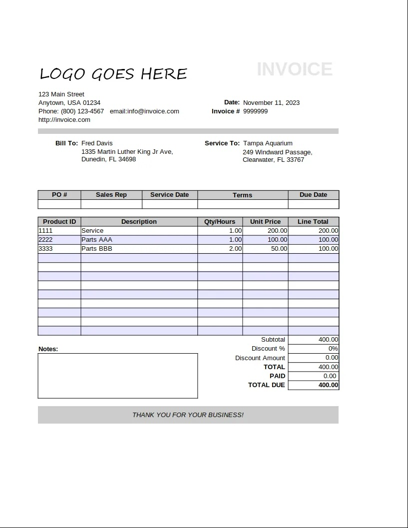

In [8]:
invoice_image = remote_image("https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.invoice/invoice_1.jpg")
W, H = invoice_image.size
display(invoice_image.resize((int(W * 0.5), int(H * 0.5))))

In [10]:
from vlmrun.hub.schemas.document.invoice import Invoice
from vlmrun.client.types import GenerationConfig
import json

invoice_result = client.image.generate(
    images=[invoice_image],
    domain="document.invoice",
    config=GenerationConfig(
        json_schema=Invoice.model_json_schema()
    )
)
print("\nInvoice Analysis Results:")
print(json.dumps(invoice_result.response, indent=2))


Invoice Analysis Results:
{
  "invoice_id": "9999999",
  "period_start": null,
  "period_end": null,
  "invoice_issue_date": "2023-11-11",
  "invoice_due_date": null,
  "order_id": null,
  "customer_id": null,
  "issuer": "LOGO GOES HERE",
  "issuer_address": {
    "street": "123 Main Street",
    "city": "Anytown",
    "state": null,
    "postal_code": "01234",
    "country": "USA"
  },
  "customer": "Fred Davis",
  "customer_email": null,
  "customer_phone": null,
  "customer_billing_address": {
    "street": "1335 Martin Luther King Jr Ave",
    "city": "Dunedin",
    "state": "FL",
    "postal_code": "34698",
    "country": null
  },
  "customer_shipping_address": {
    "street": "249 Windward Passage",
    "city": "Clearwater",
    "state": "FL",
    "postal_code": "33767",
    "country": null
  },
  "items": [
    {
      "description": "Service",
      "quantity": 1,
      "currency": "USD",
      "unit_price": 200.0,
      "total_price": 200.0
    },
    {
      "description":

> Note: We can achieve the same without passing the json schema, as it is pre-defined and doesn't need to be customized.

In [12]:
invoice_result = client.image.generate(
    images=[invoice_image],
    domain="document.invoice",
)
print("\nInvoice Analysis Results:")
print(json.dumps(invoice_result.response, indent=2))


Invoice Analysis Results:
{
  "invoice_id": "9999999",
  "period_start": null,
  "period_end": null,
  "invoice_issue_date": "2023-11-11",
  "invoice_due_date": null,
  "order_id": null,
  "customer_id": null,
  "issuer": "LOGO GOES HERE",
  "issuer_address": {
    "street": "123 Main Street",
    "city": "Anytown",
    "state": "USA",
    "postal_code": "01234",
    "country": null
  },
  "customer": "Tampa Aquarium",
  "customer_email": null,
  "customer_phone": null,
  "customer_billing_address": {
    "street": "1335 Martin Luther King Jr Ave",
    "city": "Dunedin",
    "state": "FL",
    "postal_code": "34698",
    "country": null
  },
  "customer_shipping_address": {
    "street": "249 Windward Passage",
    "city": "Clearwater",
    "state": "FL",
    "postal_code": "33767",
    "country": null
  },
  "items": [
    {
      "description": "Service",
      "quantity": 1,
      "currency": null,
      "unit_price": 200.0,
      "total_price": 200.0
    },
    {
      "descriptio

Also, as you can see above, the response attribute `invoice_result.response` is a pydantic model with populated values

Let's check the response of different schemas in the registry covering multiple categories

In [13]:
import pandas as pd

examples = [
    {
        "title": "Invoice Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.invoice/invoice_1.jpg",
        "domain": "document.invoice"
    },
    {
        "title": "Resume Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.resume/bill-resume.webp",
        "domain": "document.resume"
    },
    {
        "title": "US Passport Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-passport/2020-Next-Gen-US-Passport.png",
        "domain": "document.us-passport"
    },
    {
        "title": "Medical Insurance Card",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/healthcare.medical-insurance-card/blue_cross_example.jpg",
        "domain": "healthcare.medical-insurance-card"
    },
    {
        "title": "NBA Game Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/media.nba-game-state/heats_spurs.png",
        "domain": "media.nba-game-state"
    },
    {
        "title": "TV News Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/media.tv-news/bbc_news_ukraine_screenshot.jpg",
        "domain": "media.tv-news"
    },
    {
        "title": "Remote Sensing Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/aerospace.remote-sensing/planet_labs_port.jpg",
        "domain": "aerospace.remote-sensing"
    },
    {
        "title": "Product Analysis",
        "url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/retail.ecommerce-product-caption/Electronics%20-%20Kindle.webp",
        "domain": "retail.ecommerce-product-caption"
    }
]

# Get all the image files
df = pd.DataFrame(examples)
df = df.assign(image=lambda x: x["url"].apply(lambda file: remote_image(file)))
df.head()

title                                                url  \
0        Invoice Analysis  https://storage.googleapis.com/vlm-data-public...   
1         Resume Analysis  https://storage.googleapis.com/vlm-data-public...   
2    US Passport Analysis  https://storage.googleapis.com/vlm-data-public...   
3  Medical Insurance Card  https://storage.googleapis.com/vlm-data-public...   
4       NBA Game Analysis  https://storage.googleapis.com/vlm-data-public...   

                              domain  \
0                   document.invoice   
1                    document.resume   
2               document.us-passport   
3  healthcare.medical-insurance-card   
4               media.nba-game-state   

                                               image  
0  <PIL.Image.Image image mode=RGB size=817x1057 ...  
1  <PIL.Image.Image image mode=RGB size=760x1124 ...  
2  <PIL.Image.Image image mode=RGB size=1700x2200...  
3  <PIL.Image.Image image mode=RGB size=400x260 a...  
4  <PIL.Image.Image image mode=RGB size=1280x720 ...


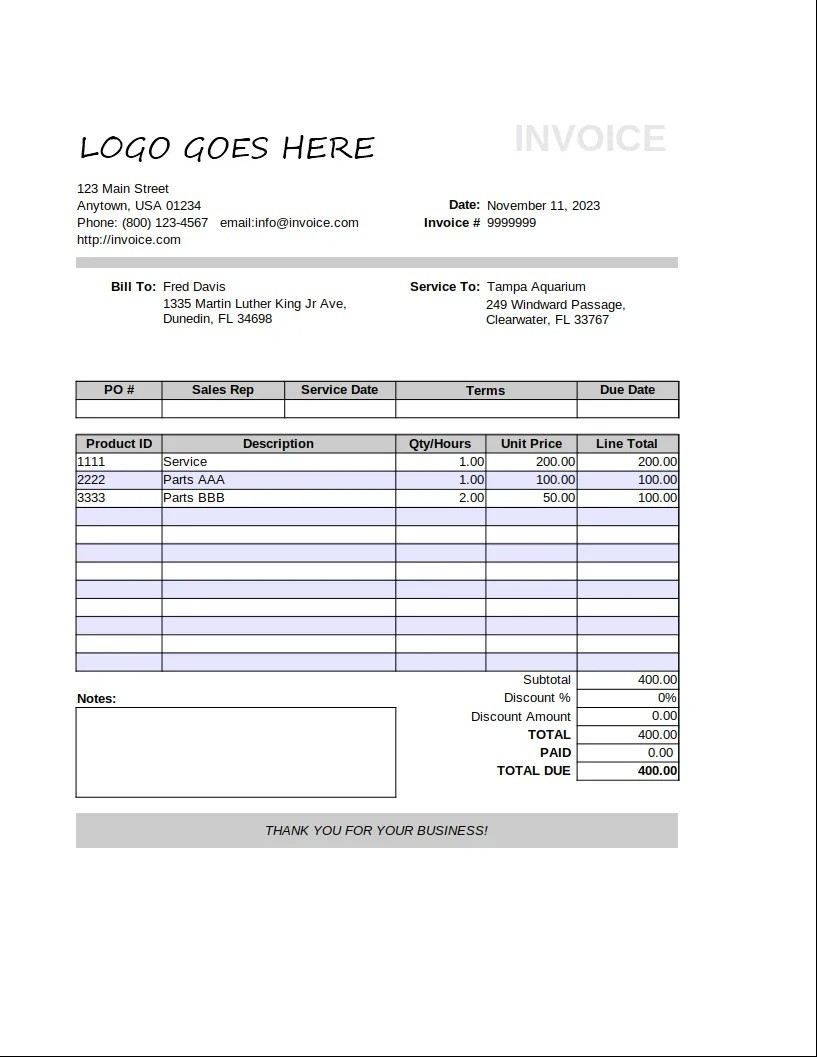
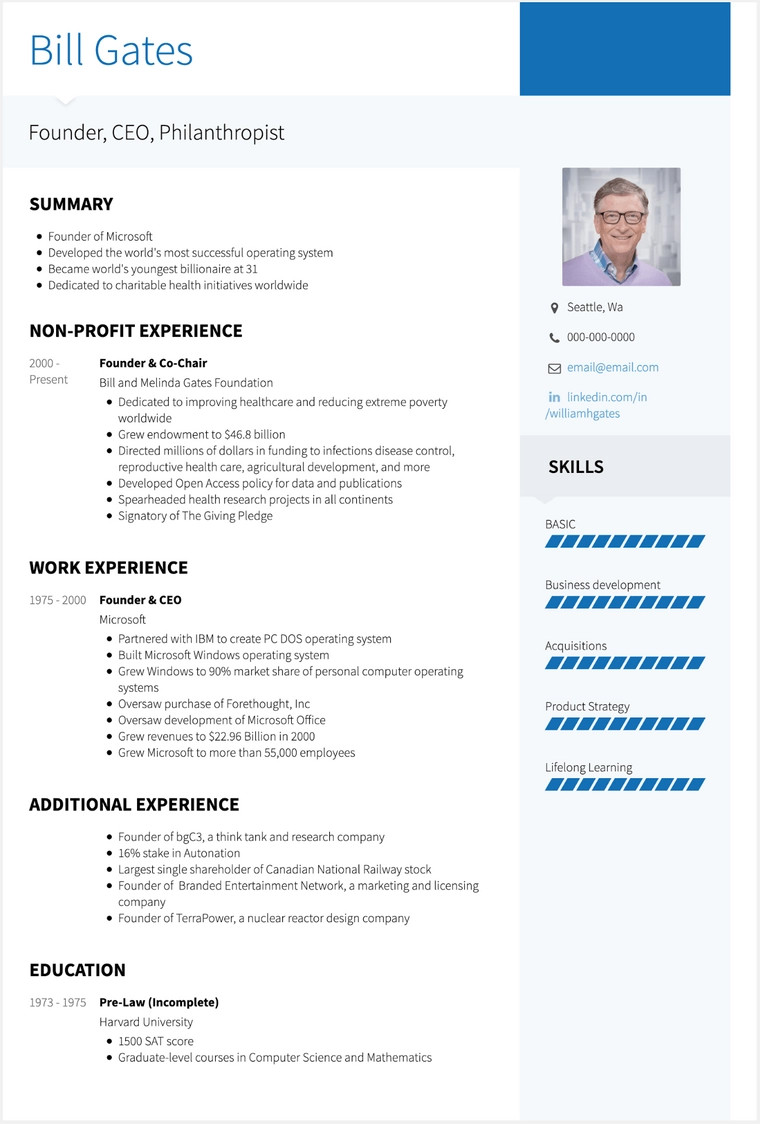
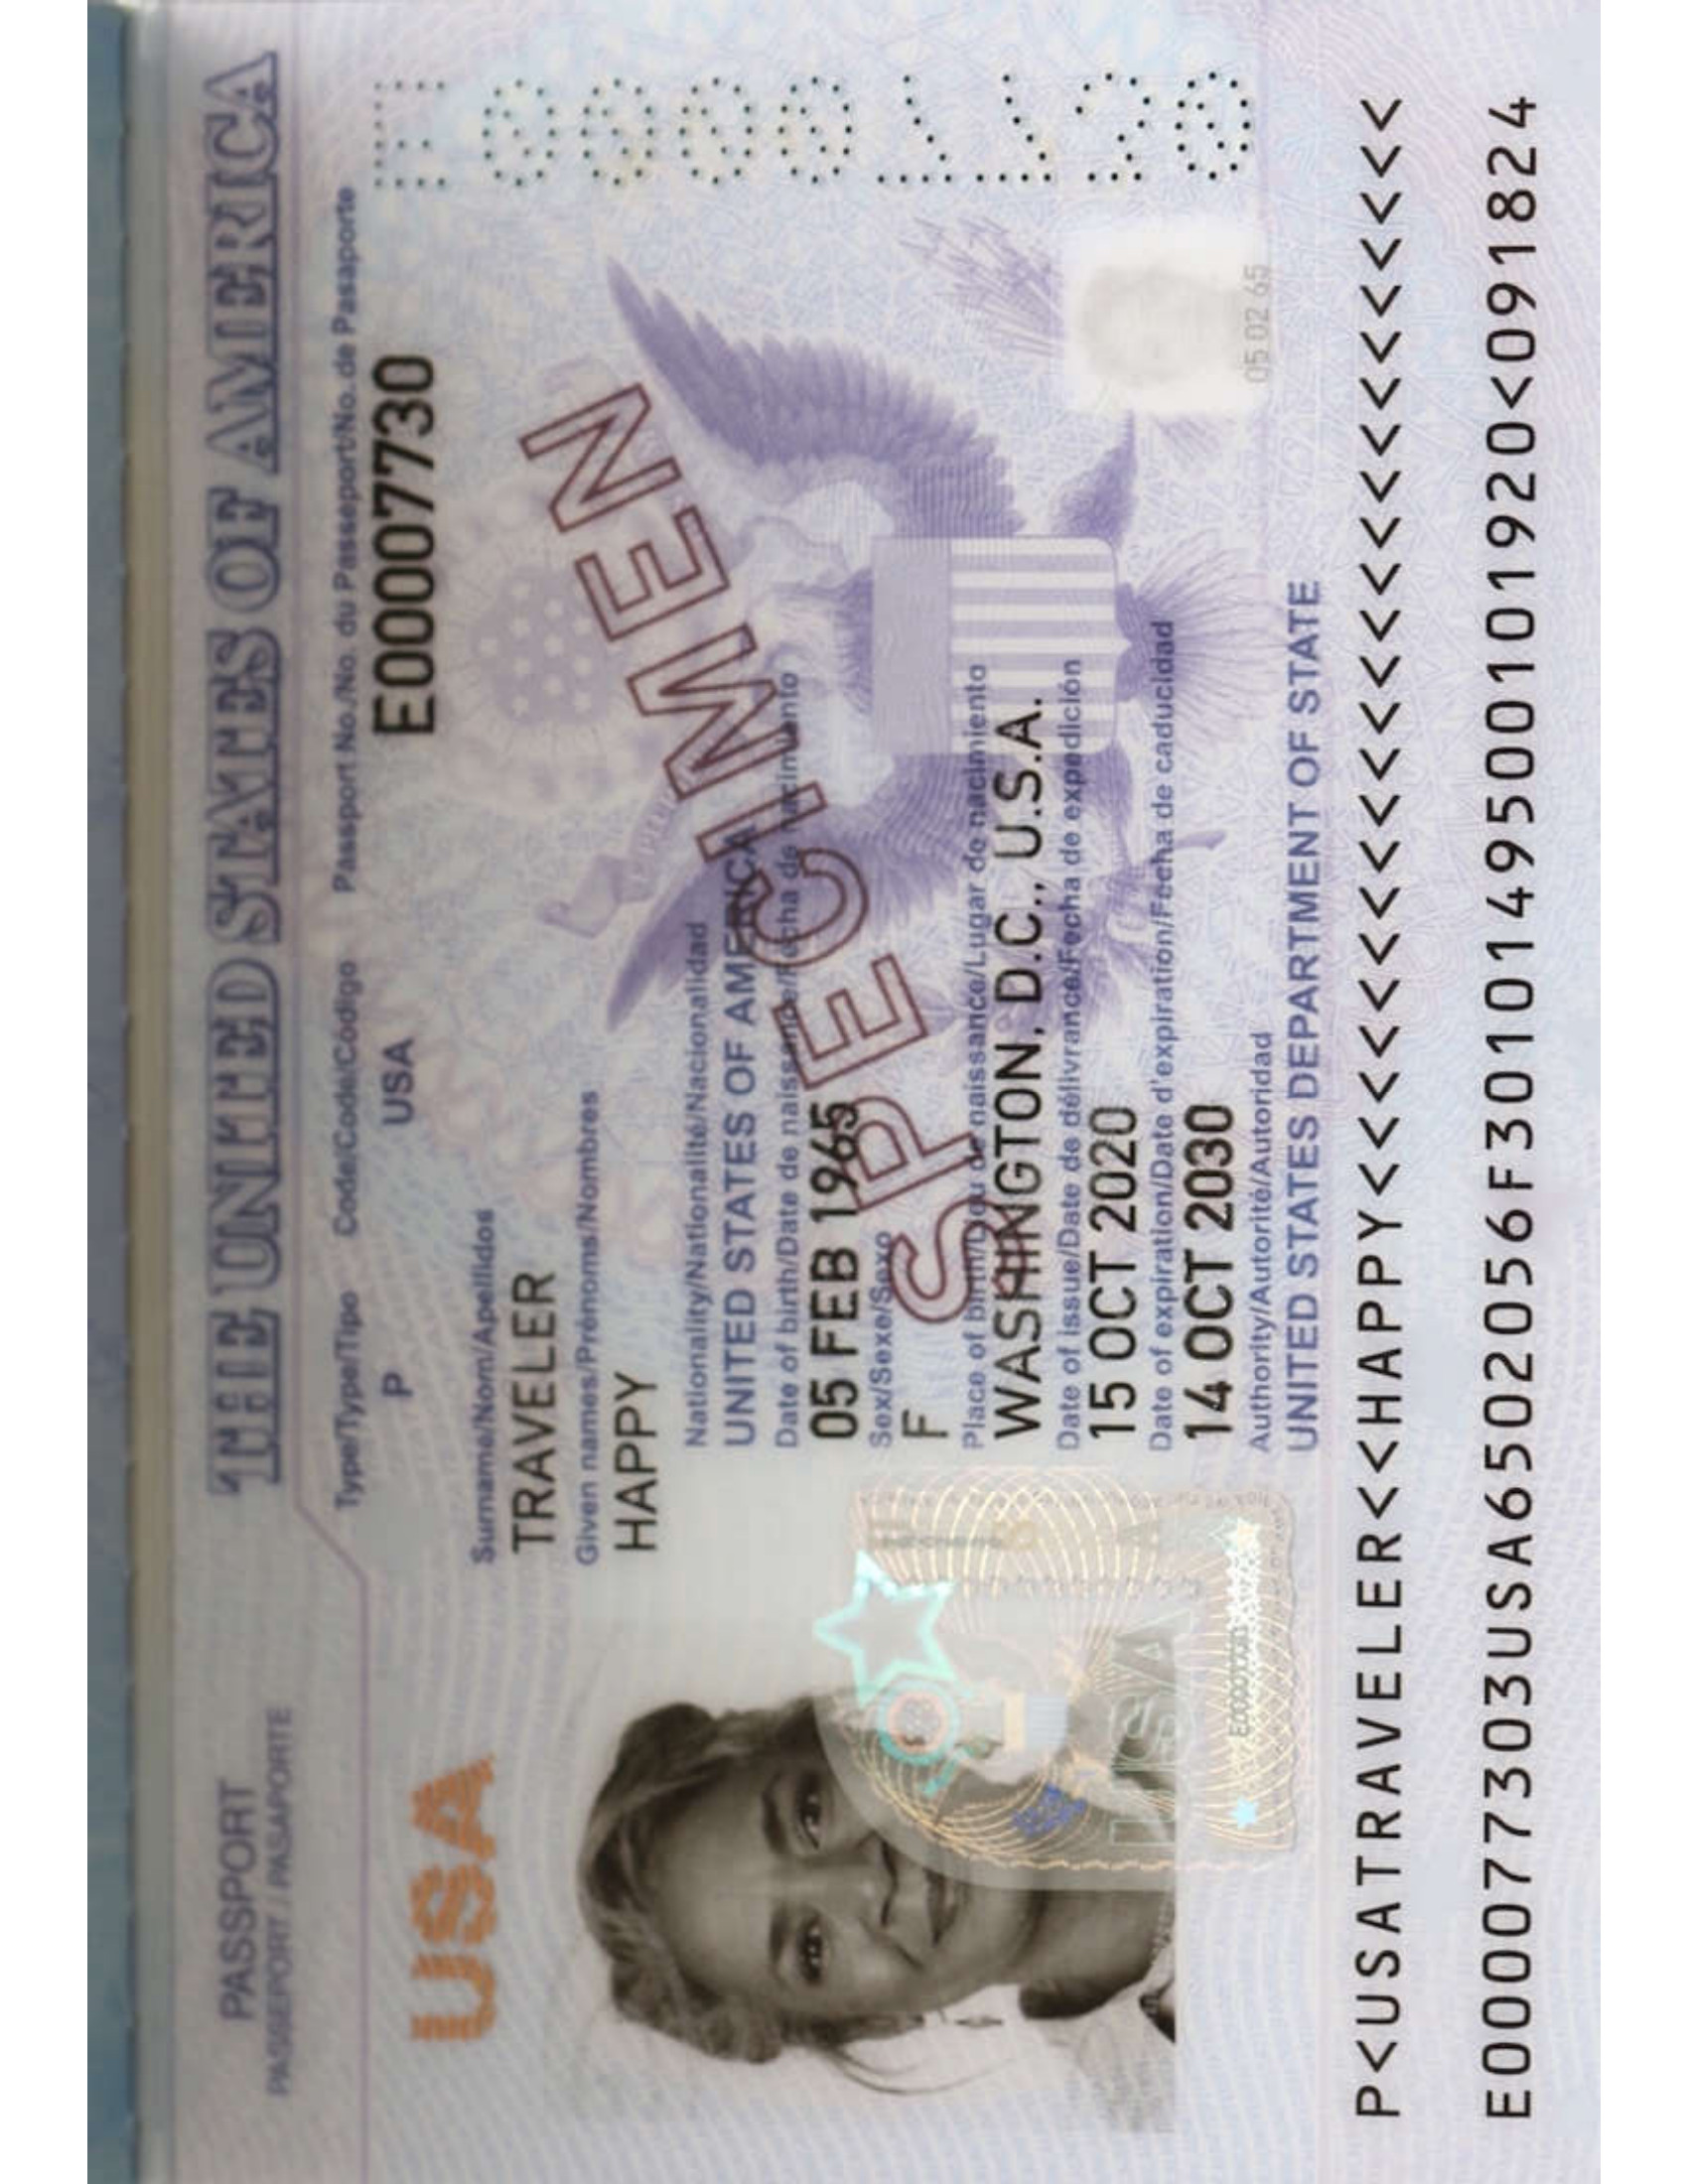
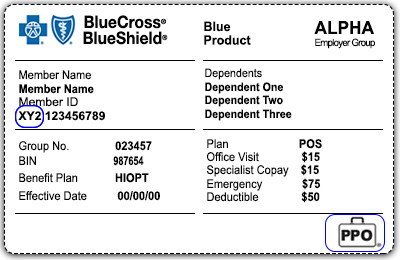
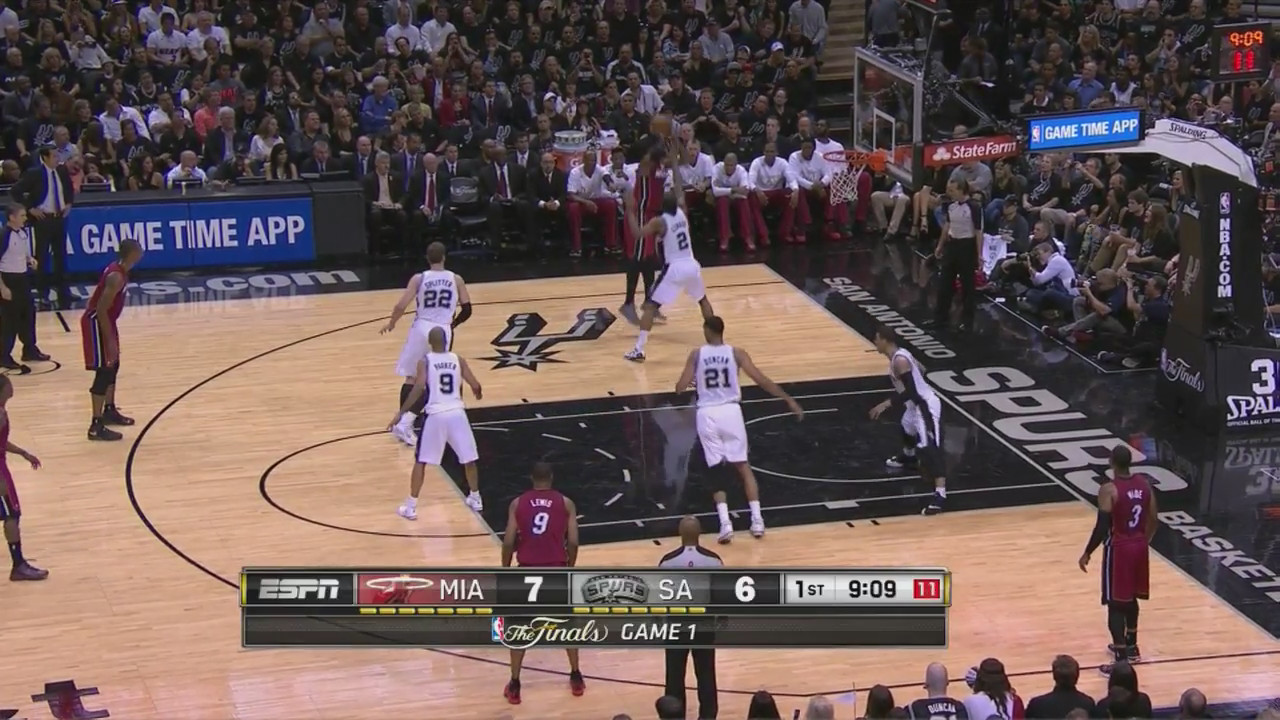
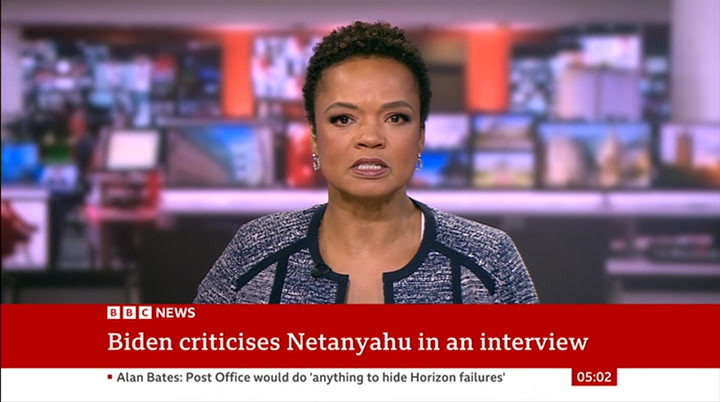
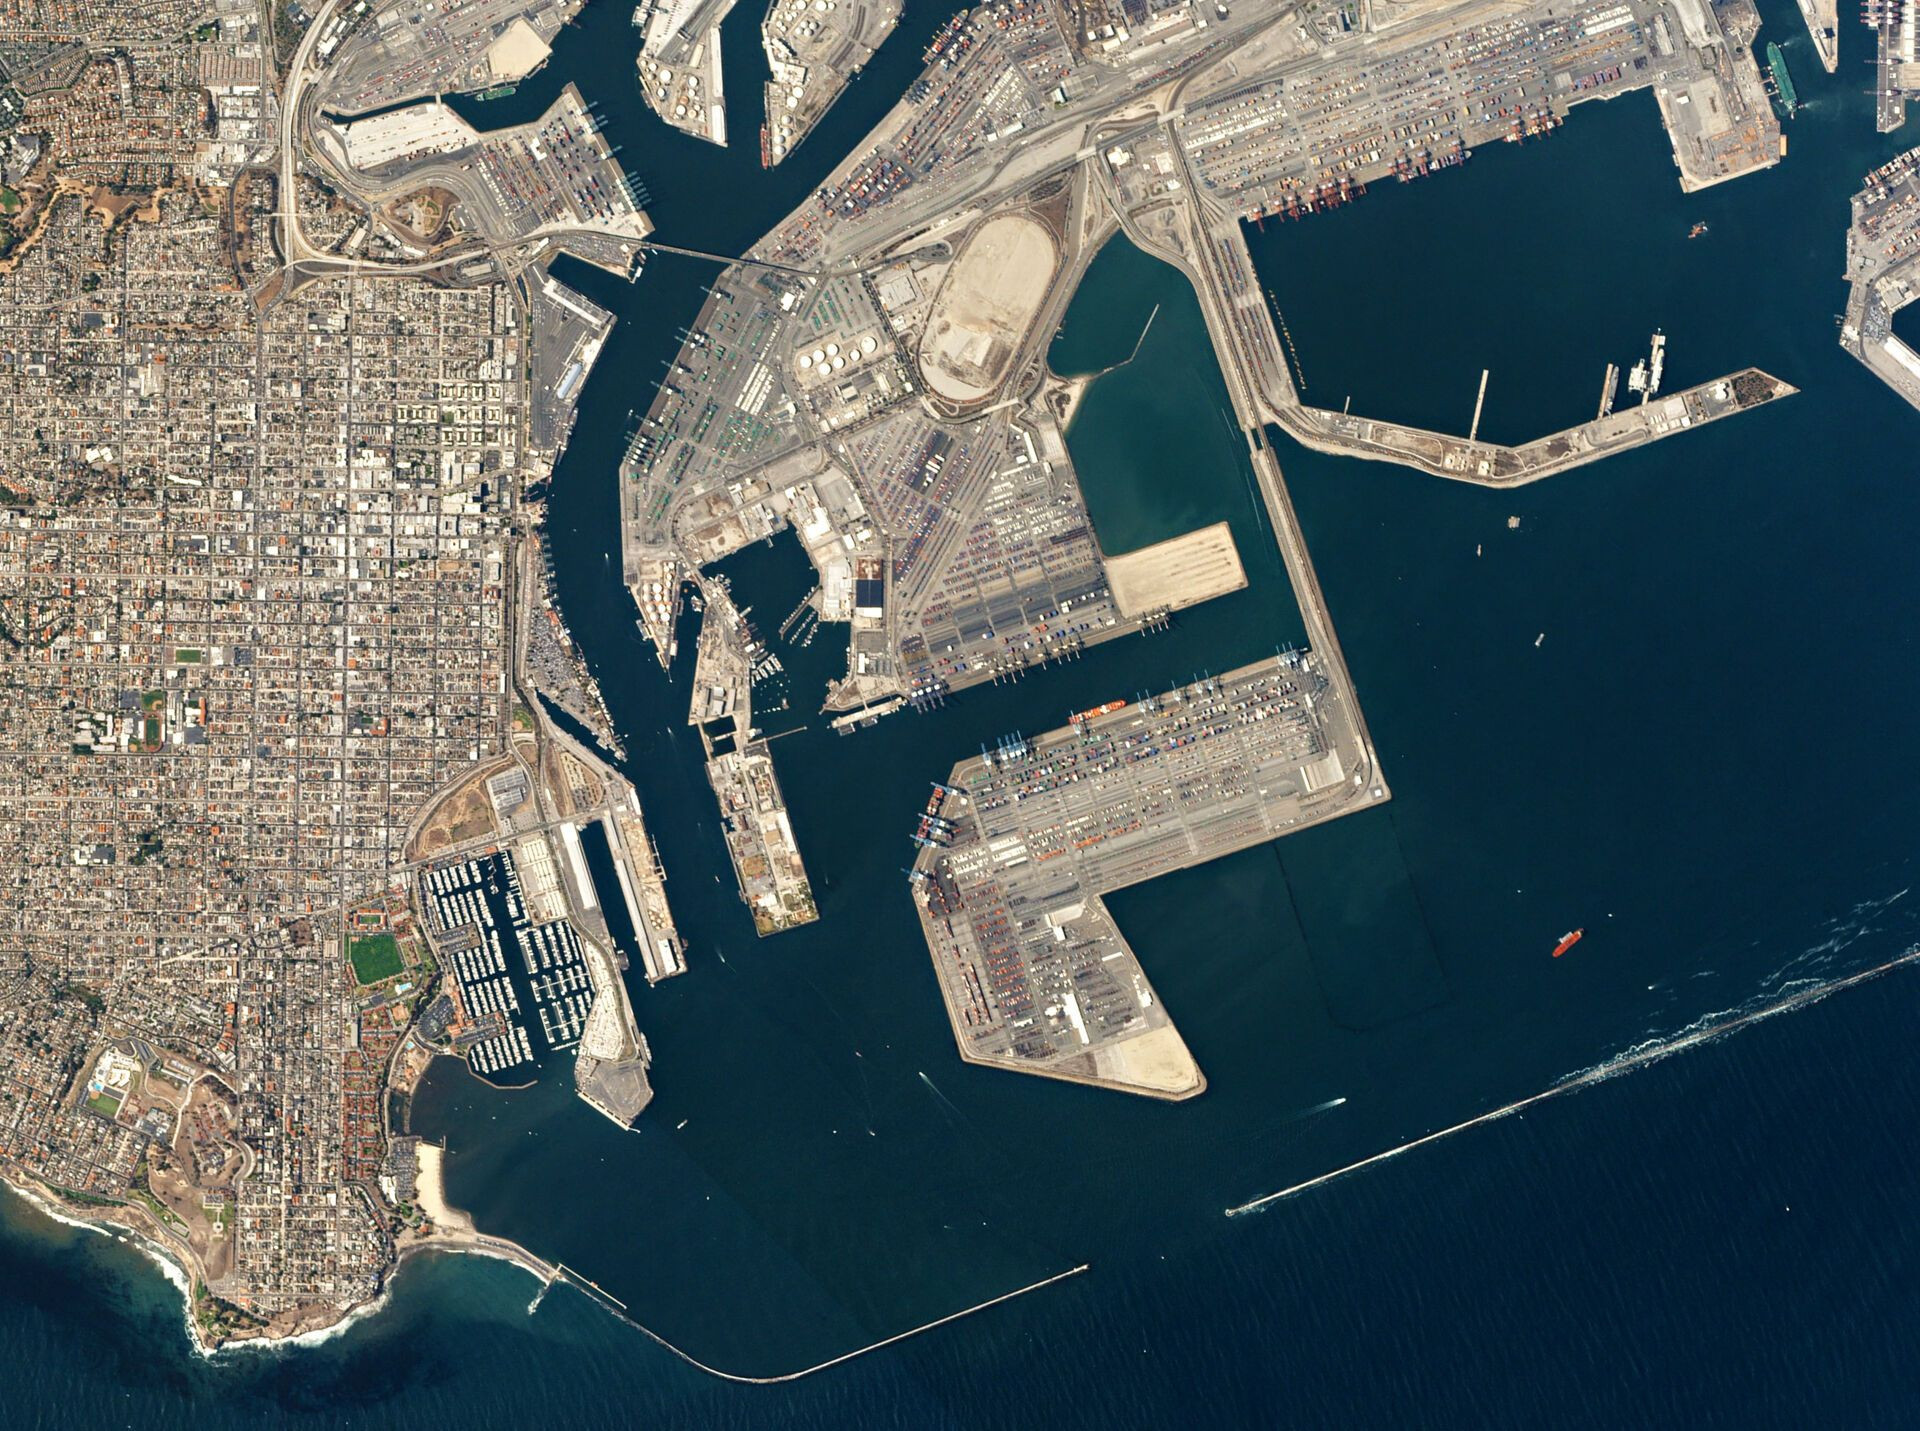
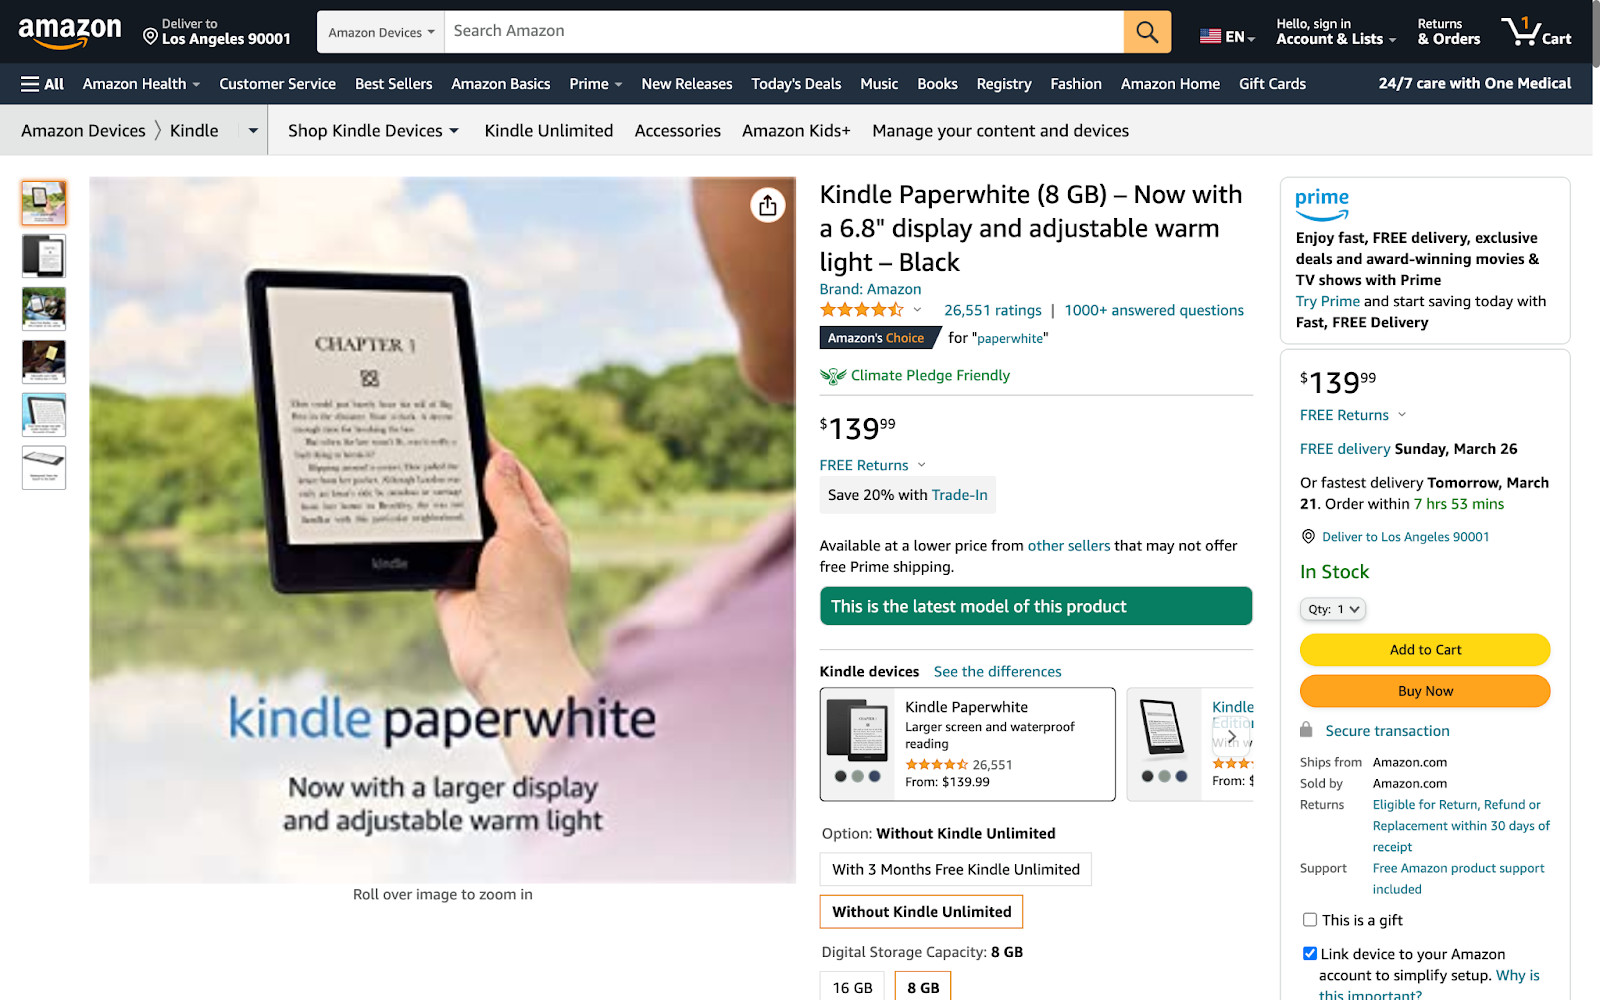

In [14]:
import json
from vlmrun.common.image import encode_image
from IPython.display import HTML, display

formatters = {
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='500'>"
}
cols = ["url", "image"]
display(HTML(df[cols].head(n=10).to_html(formatters=formatters, escape=False)))

In [16]:
# Main image -> JSON prediction
def predict(image, domain):
    try:
        return client.image.generate(images=[image], domain=domain).response
    except Exception as e:
        print(f"Failed to predict [image={image}, domain={domain}, exc={e}]")
        return None

# Generate responses for all examples
# row -> image, domain -> predict(image, domain)
df_response = df.assign(
    response=lambda x: x[["image", "domain"]].apply(lambda row: predict(row["image"], row["domain"]), axis=1),
)

In [ ]:
df_response

title                                                url  \
0         Invoice Analysis  https://storage.googleapis.com/vlm-data-public...   
1          Resume Analysis  https://storage.googleapis.com/vlm-data-public...   
2     US Passport Analysis  https://storage.googleapis.com/vlm-data-public...   
3   Medical Insurance Card  https://storage.googleapis.com/vlm-data-public...   
4        NBA Game Analysis  https://storage.googleapis.com/vlm-data-public...   
5         TV News Analysis  https://storage.googleapis.com/vlm-data-public...   
6  Remote Sensing Analysis  https://storage.googleapis.com/vlm-data-public...   
7         Product Analysis  https://storage.googleapis.com/vlm-data-public...   

                              domain  \
0                   document.invoice   
1                    document.resume   
2               document.us-passport   
3  healthcare.medical-insurance-card   
4               media.nba-game-state   
5                      media.tv-news   
6           aerospace.remote-sensing   
7   retail.ecommerce-product-caption   

                                               image  \
0  <PIL.Image.Image image mode=RGB size=817x1057 ...   
1  <PIL.Image.Image image mode=RGB size=760x1124 ...   
2  <PIL.Image.Image image mode=RGB size=1700x2200...   
3  <PIL.Image.Image image mode=RGB size=400x260 a...   
4  <PIL.Image.Image image mode=RGB size=1280x720 ...   
5  <PIL.Image.Image image mode=RGB size=720x402 a...   
6  <PIL.Image.Image image mode=RGB size=1920x1431...   
7  <PIL.Image.Image image mode=RGB size=1600x1000...   

                                            response  
0  invoice_id='9999999' period_start=None period_...  
1  contact_info=ContactInfo(full_name='Bill Gates...  
2  family_name='TRAVELER' given_names='HAPPY' doc...  
3  provider_service=None member_information=Membe...  
4  description='Game 1 of the NBA Finals between ...  
5  description="A news broadcast with a presenter...  
6  description='The satellite image shows an aeri...  
7  description='The Kindle Paperwhite features a ...


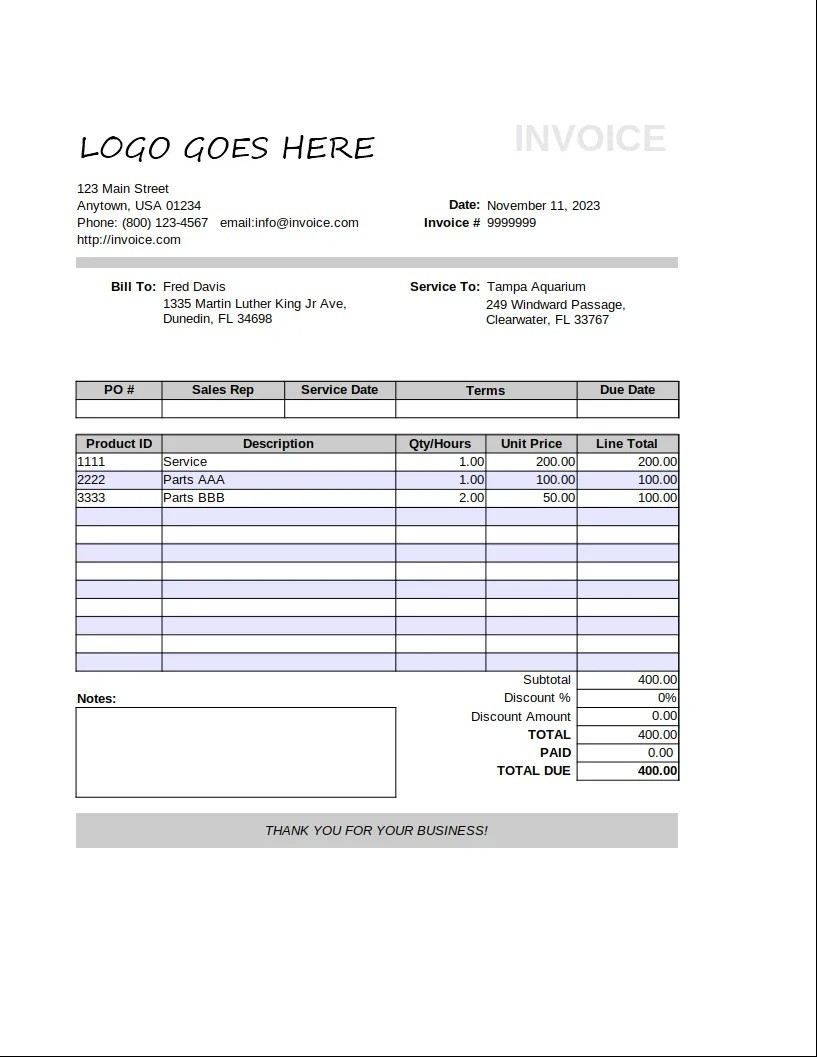
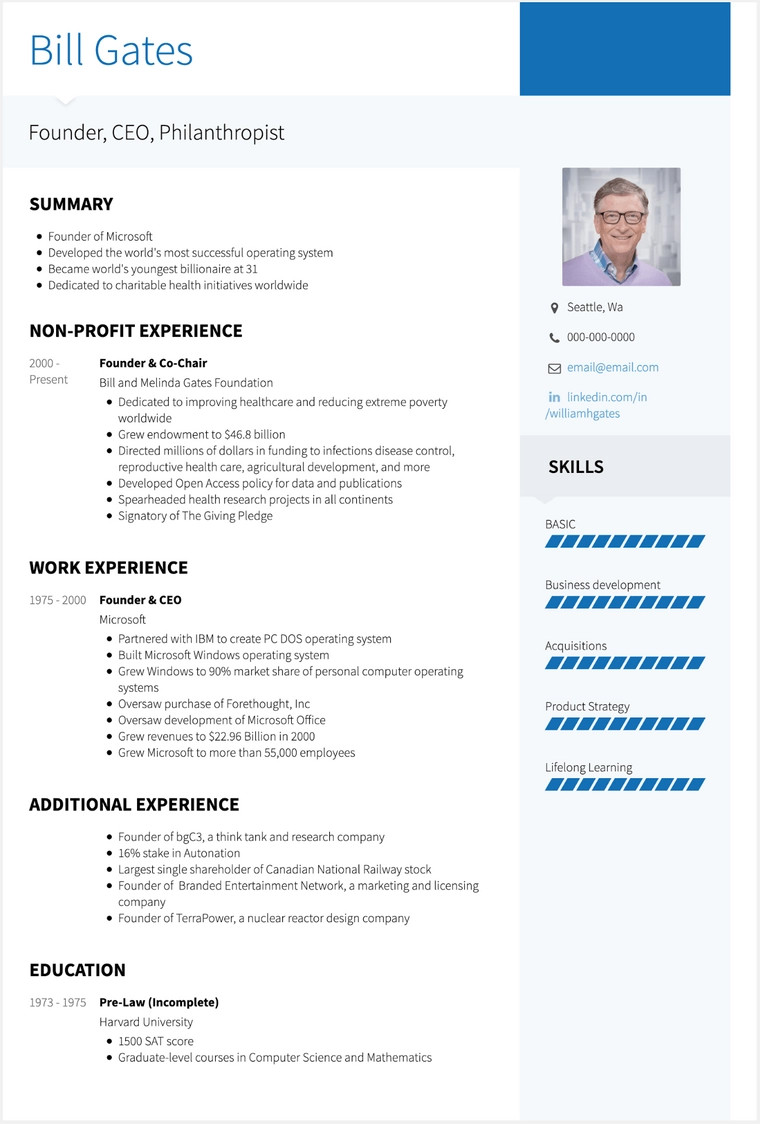
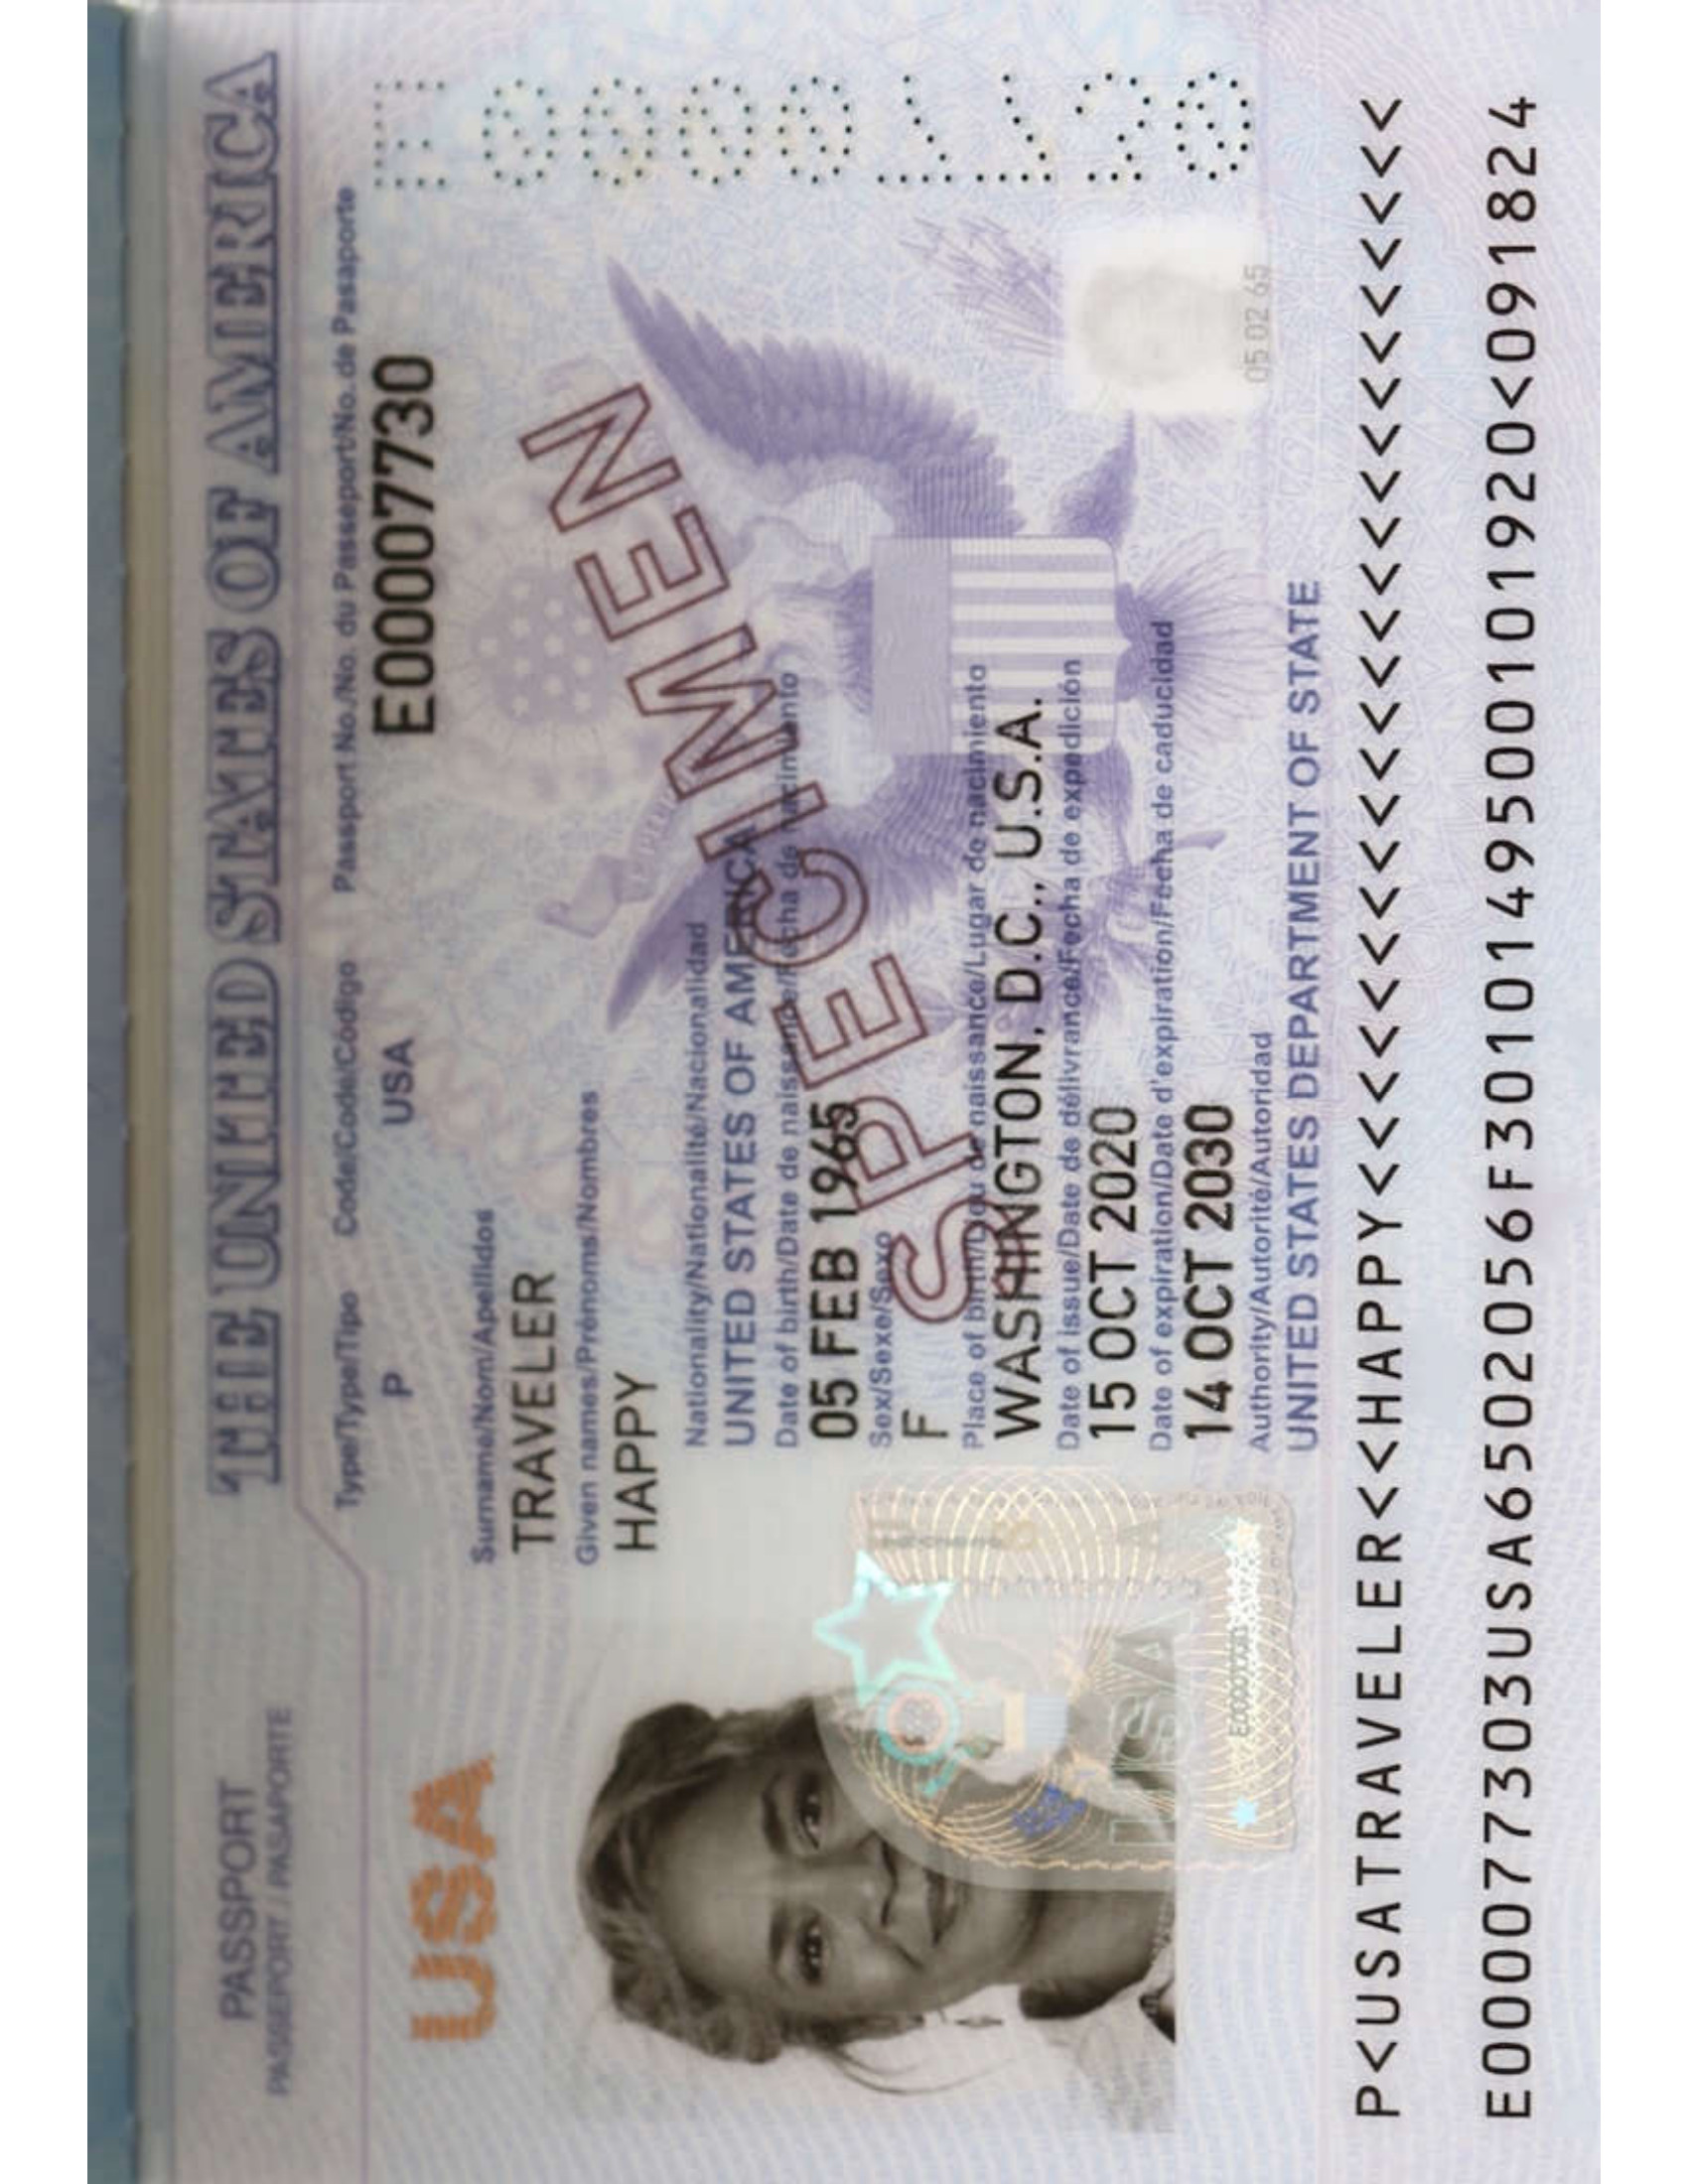
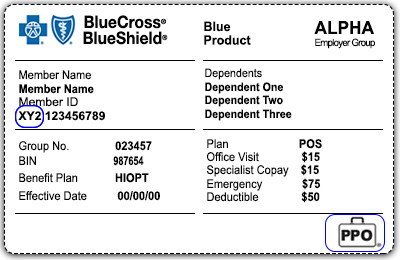
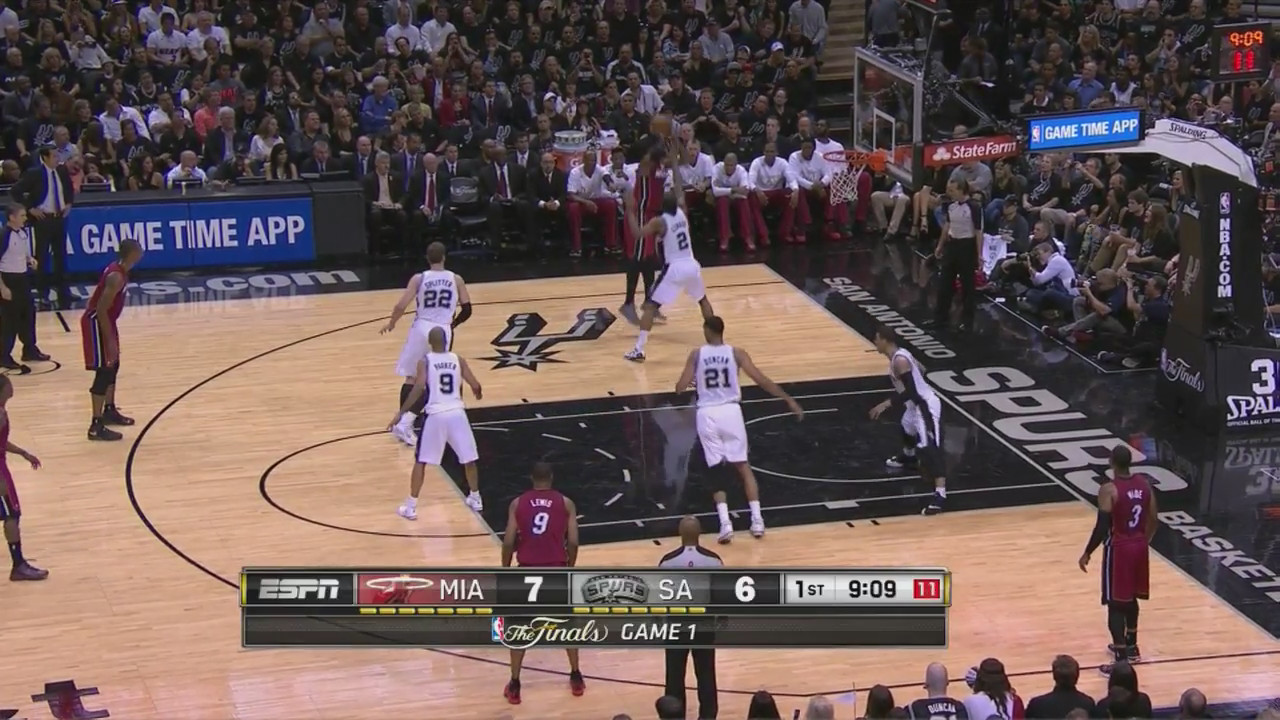
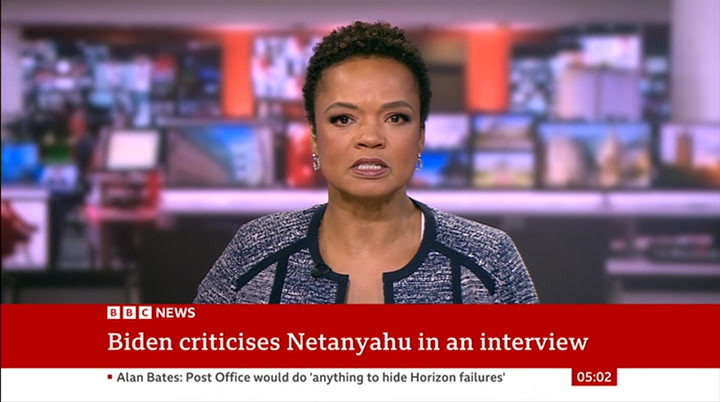
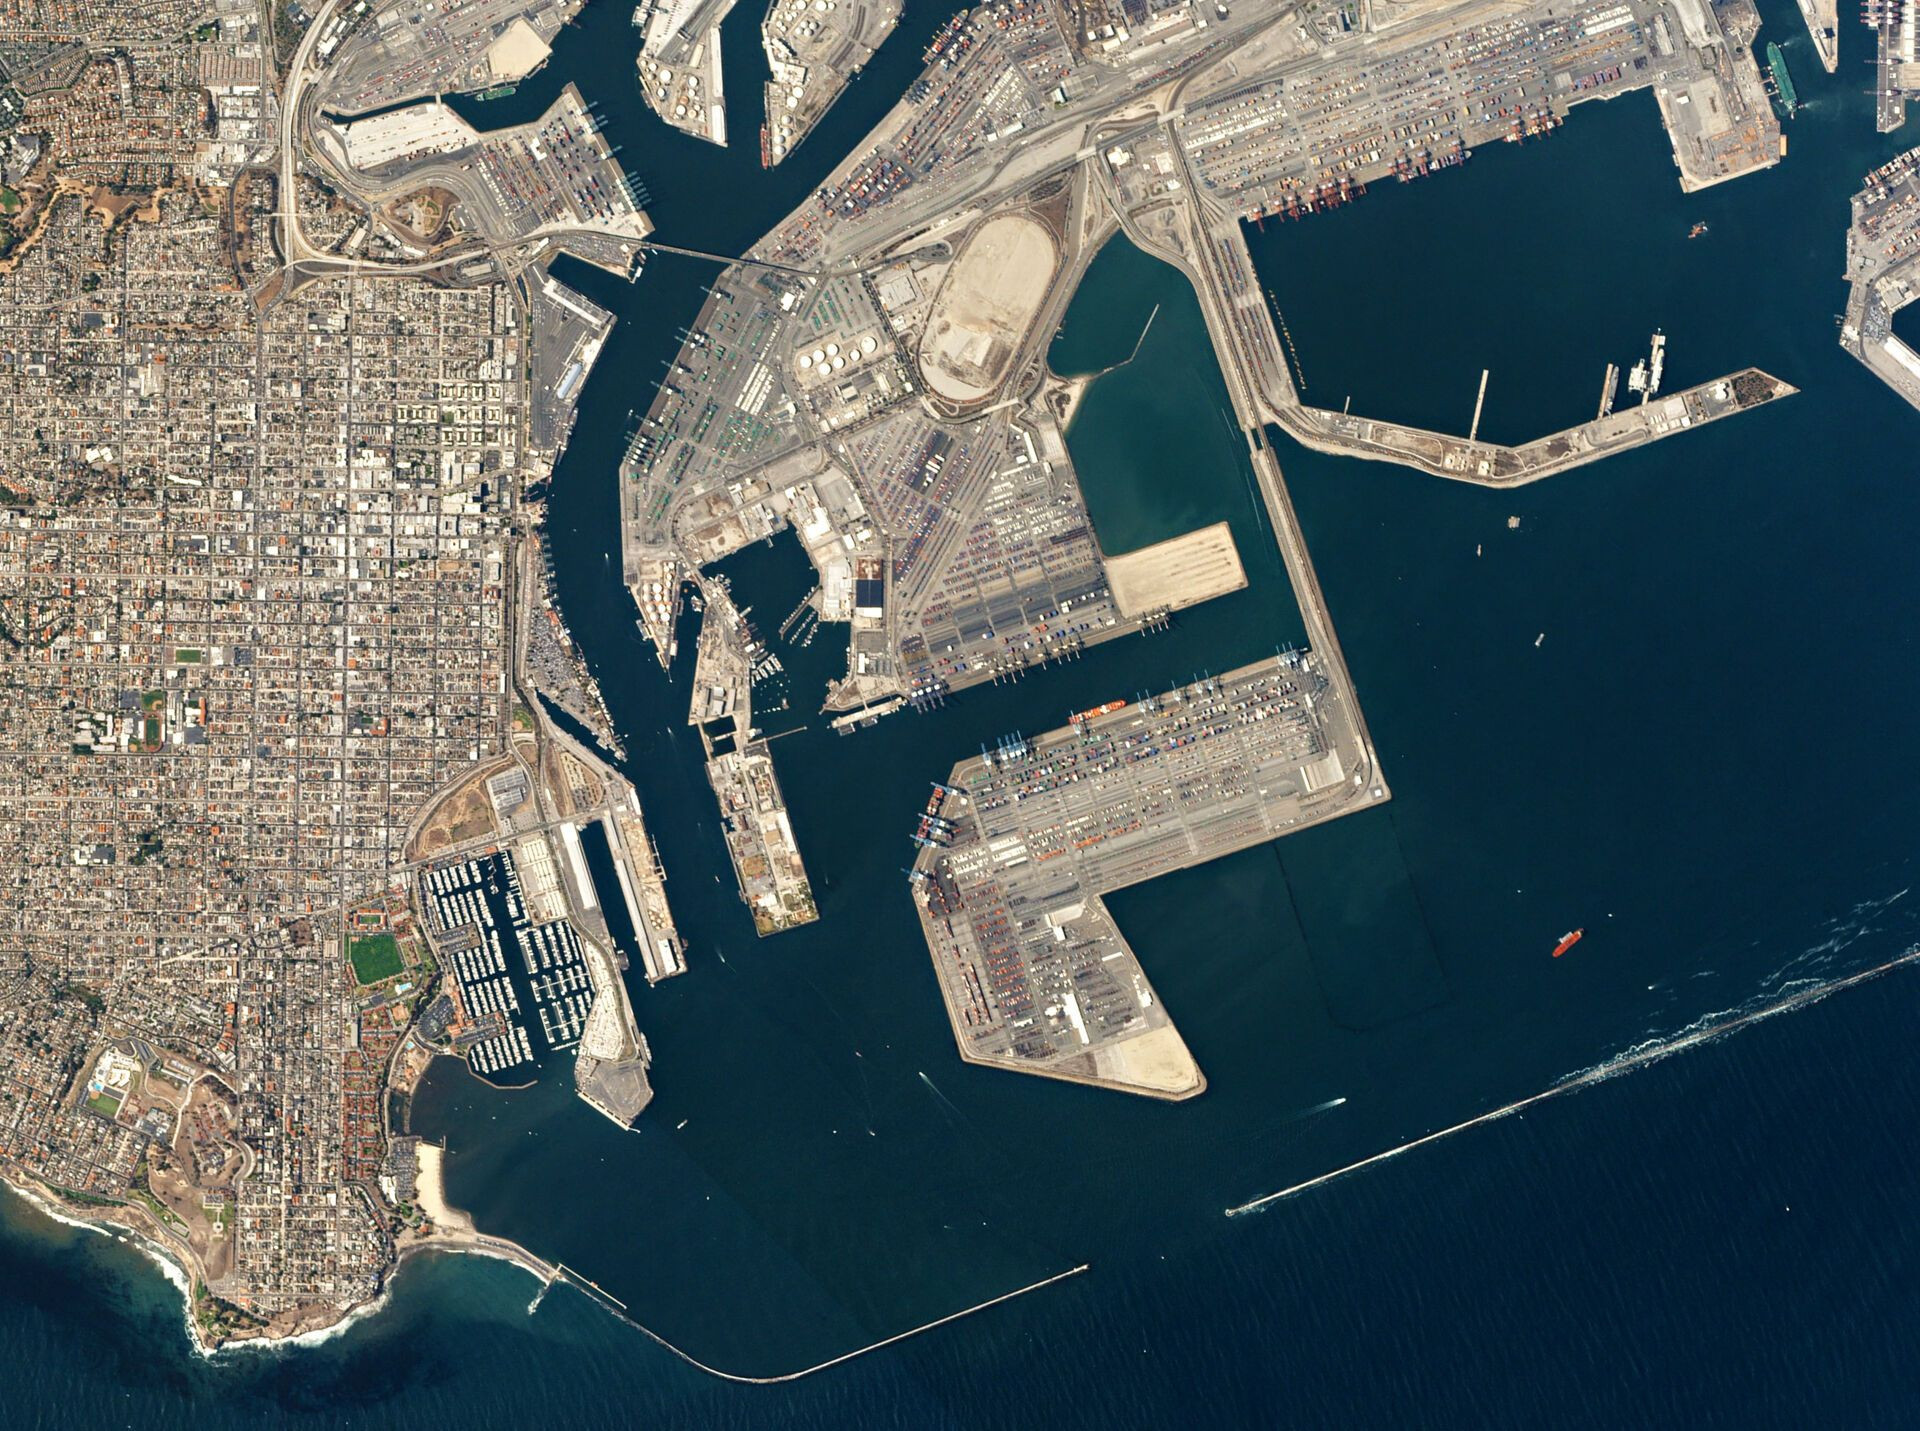
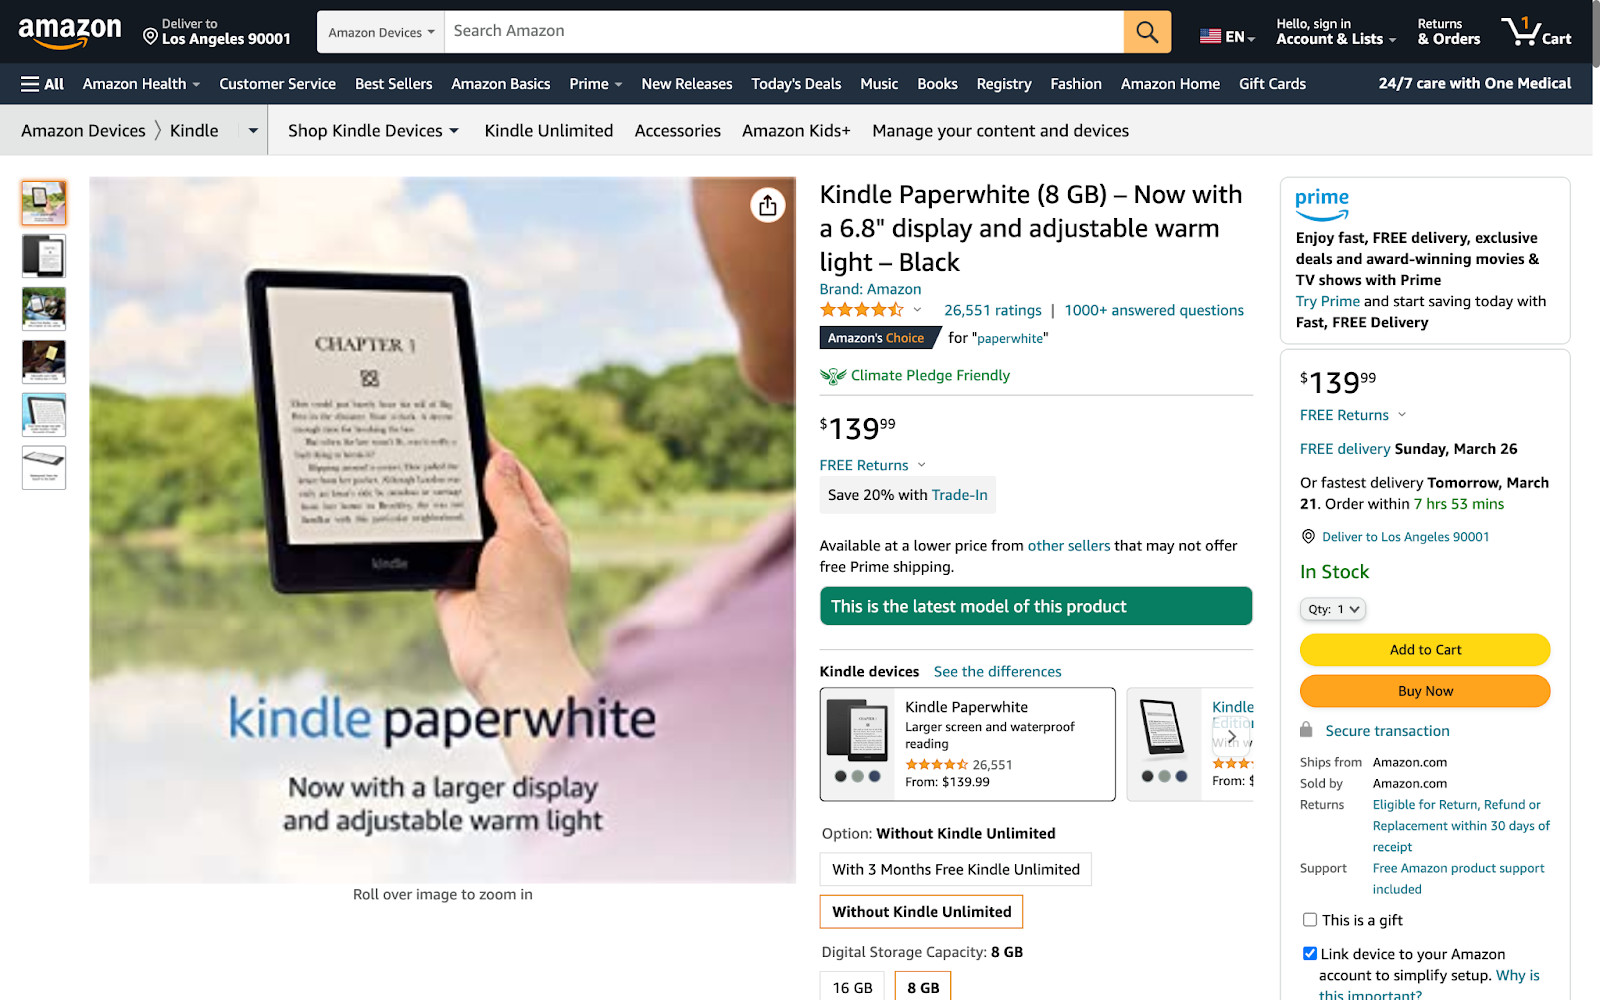

In [18]:
def render_json(response):
    """Render JSON in HTML with new lines for each key and value"""
    return json.dumps(invoice_result.response, indent=2).replace("\n", "<br>")

pd.set_option("display.max_colwidth", 10)
formatters = {
    "response": lambda x: render_json(x) if x is not None else "",
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='90%'>"
}
cols = ["image", "response"]
display(HTML(df_response[cols].to_html(formatters=formatters, escape=False)))

## 💡 Pro Tips for Using VLM Schemas

1. Choosing the Right Schema:
   - Use specific schemas for better results
   - Check schema field for ideal use cases
   - Consider domain-specific requirements
   - Experiment with different field and description if needed

2. Best Practices:
   - Ensure good image quality
   - Handle errors appropriately
   - Validate outputs against schema requirements

3. Common Use Cases:
   - Document Processing: Invoices, resumes, IDs
   - Healthcare: Insurance cards, patient intake forms
   - Sports & Media: Game analysis, news content
   - Retail: Product cataloging, ad analysis
   - Aerospace: Satellite imagery analysis